<a href="https://colab.research.google.com/github/khadija9oor/CODSOFT/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name :: Khadija Noor
# session ::  5 september
-----------------------------------------------------------
# Task:
#objective is to train a machine learning model that can learn from
#these measurements and accurately classify the Iris flowers into
#their respective species.

#Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

##Loading the Dataset

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###There is no null value in dataset

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#check Outliers in dataset with vaisualization

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6f86f6b640>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6f86e51fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6f4b33c5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6f86e53460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6f86e538b0>],
 'means': []}

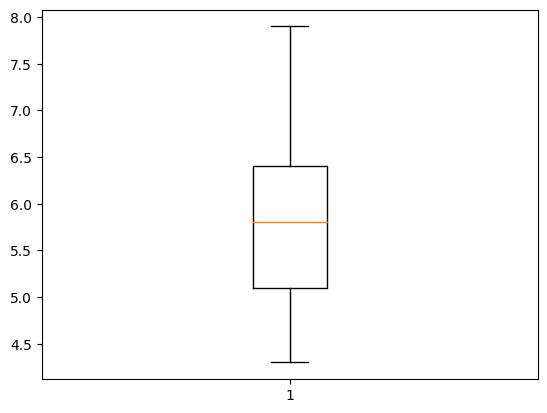

In [ ]:
plt.boxplot(df['sepal_length'])

##There are no outlier in sepal_length

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6f4df78ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6f4df79bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6f4df79930>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6f4df79150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6f4df78040>],
 'means': []}

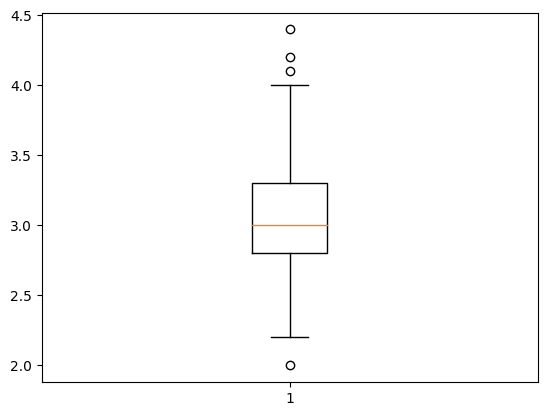

In [ ]:
plt.boxplot(df['sepal_width'])

##There are some outlier in sepal_width

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6f4ad10b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6f4ad11060>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6f4ad10880>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6f4ad115a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6f4ad11840>],
 'means': []}

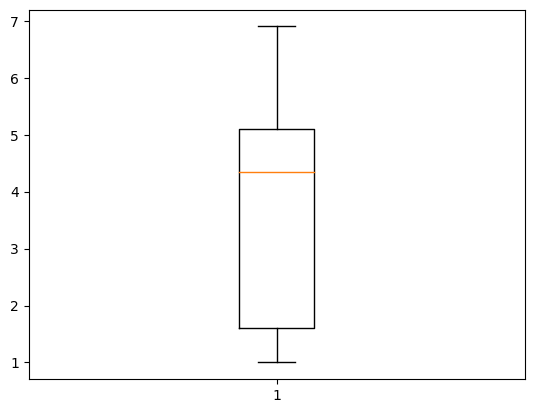

In [ ]:
plt.boxplot(df['petal_length'])

##There is no outliers in petal_length

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6f4ad84100>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6f4ad84640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6f4ad57e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6f4ad84b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6f4ad84e20>],
 'means': []}

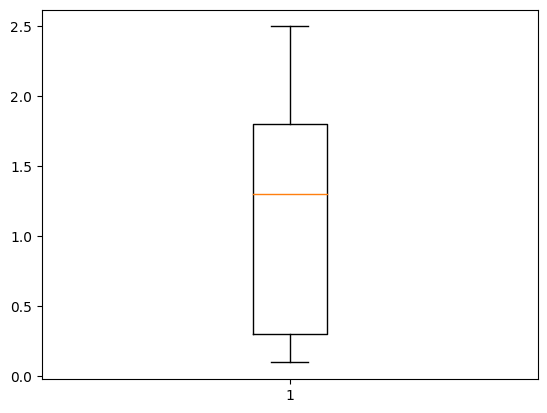

In [ ]:
plt.boxplot(df['petal_width'])

##There is no outlier in petal_width

<ipython-input-62-8451b8490161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

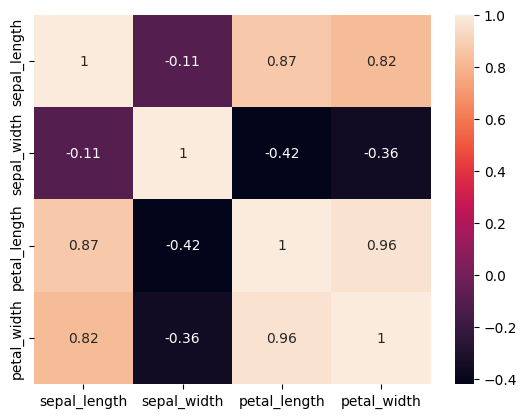

In [ ]:
sns.heatmap(df.corr(),annot =True)

## As we have species 3 catogires which we have to convert in numeric  for out model training we used  onehotencode


In [ ]:
species_numeric = {'Iris-setosa':1 , 'Iris-versicolor':2 , 'Iris-virginica':3}
df.species = [species_numeric[i] for i in df.species]


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


##Selcting Taget Varibale  and independent variables

In [ ]:
x = df.drop(columns=['species'])

y = df['species']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33 ,random_state =42)

#Training Model

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
model.score(x, y)


0.9304223675331595

In [ ]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [ ]:
model.intercept_

1.192083994828139

#Make Predictions

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[2.19756726 0.96731454 3.20111558 2.34168532 2.2654272  1.0335223
 2.05930184 2.85818604 2.35070534 2.05331264 2.71469034 0.91139498
 0.850745   0.91869693 0.98775914 2.39745639 3.00441822 2.02311961
 2.25705298 2.97884018 1.01991072 2.60005592 1.10011902 2.91785077
 2.82960982 2.90725851 2.76063251 3.04633725 1.0333738  1.01336062
 0.87698786 0.95635941 2.17232866 1.00008849 0.98473275 2.6839174
 2.2845166  0.92906772 0.92389183 0.84153404 2.75264018 2.38055451
 2.30141848 0.9660018  0.89827134 1.93212811 2.44938775 2.69891026
 2.18772685 3.15212358]


#Model Evolution

In [ ]:
print("Mean squared error : %2f" % np.mean((y_pred - y_test) ** 2 ))

Mean squared error : 0.041322
